<a href="https://colab.research.google.com/github/fonsecajr/Projects/blob/master/S%C3%A9ries_AnalisesxA%C3%A7%C3%B5es_Analises8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib; matplotlib.rcParams['figure.figsize'] = (22,8)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#SGS - Sistema Gerenciador de Séries Temporais - v2.1
#Consulta.codigo_serie: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
#API'Manual': https://dadosabertos.bcb.gov.br/dataset/20542-saldo-da-carteira-de-credito-com-recursos-livres---total/resource/6e2b0c97-afab-4790-b8aa-b9542923cf88
#API'Consulta_Modelo: http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados/ultimos/{N}?formato=json

In [0]:
#Índice nacional de preços ao consumidor - amplo (IPCA) - em 12 meses
url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.13522/dados/?formato=json'

In [25]:
dfIPCA = pd.read_json(url)
dfIPCA

,data,valor
0,01/12/1980,99.25
1,01/01/1981,99.67
2,01/02/1981,103.07
3,01/03/1981,101.03
4,01/04/1981,103.27
...,...,...
468,01/12/2019,4.31
469,01/01/2020,4.19
470,01/02/2020,4.01
471,01/03/2020,3.30


In [0]:
#Taxa de juros - CDI
url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.12/dados/?formato=json'

In [23]:
dfCDI = pd.read_json(url)
dfCDI

,data,valor
0,06/03/1986,0.068111
1,10/03/1986,0.069028
2,12/03/1986,0.067417
3,14/03/1986,0.064584
4,17/03/1986,0.068222
...,...,...
8548,14/05/2020,0.011345
8549,15/05/2020,0.011345
8550,18/05/2020,0.011345
8551,19/05/2020,0.011345


In [27]:
dfIPCA, dfCDI

(           data   valor
 0    01/12/1980   99.25
 1    01/01/1981   99.67
 2    01/02/1981  103.07
 3    01/03/1981  101.03
 4    01/04/1981  103.27
 ..          ...     ...
 468  01/12/2019    4.31
 469  01/01/2020    4.19
 470  01/02/2020    4.01
 471  01/03/2020    3.30
 472  01/04/2020    2.40
 
 [473 rows x 2 columns],             data     valor
 0     06/03/1986  0.068111
 1     10/03/1986  0.069028
 2     12/03/1986  0.067417
 3     14/03/1986  0.064584
 4     17/03/1986  0.068222
 ...          ...       ...
 8548  14/05/2020  0.011345
 8549  15/05/2020  0.011345
 8550  18/05/2020  0.011345
 8551  19/05/2020  0.011345
 8552  20/05/2020  0.011345
 
 [8553 rows x 2 columns])

In [33]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados/?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df
df

,data,valor
0,06/03/1986,0.068111
1,10/03/1986,0.069028
2,12/03/1986,0.067417
3,14/03/1986,0.064584
4,17/03/1986,0.068222
...,...,...
8548,14/05/2020,0.011345
8549,15/05/2020,0.011345
8550,18/05/2020,0.011345
8551,19/05/2020,0.011345


In [35]:
ipca = consulta_bc(13522)
ipca

,valor
data,
1980-12-01,99.25
1981-01-01,99.67
1981-02-01,103.07
1981-03-01,101.03
1981-04-01,103.27
...,...
2019-12-01,4.31
2020-01-01,4.19
2020-02-01,4.01


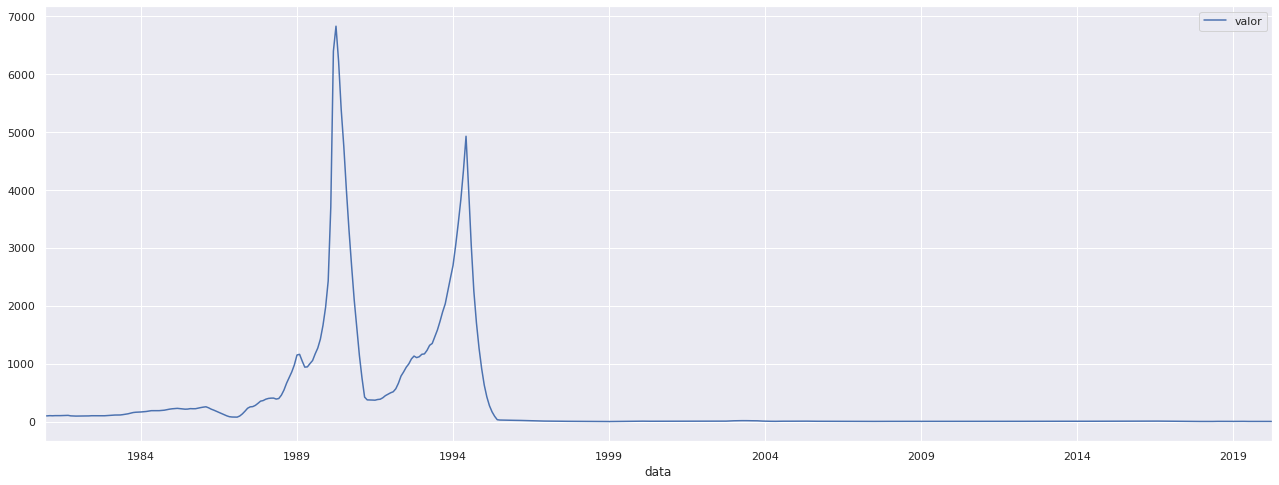

In [40]:
ipca.plot(figsize=(22,8))

In [36]:
igpm = consulta_bc(189)
igpm

,valor
data,
1989-06-01,19.68
1989-07-01,35.90
1989-08-01,36.92
1989-09-01,39.92
1989-10-01,40.64
...,...
2019-12-01,2.09
2020-01-01,0.48
2020-02-01,-0.04


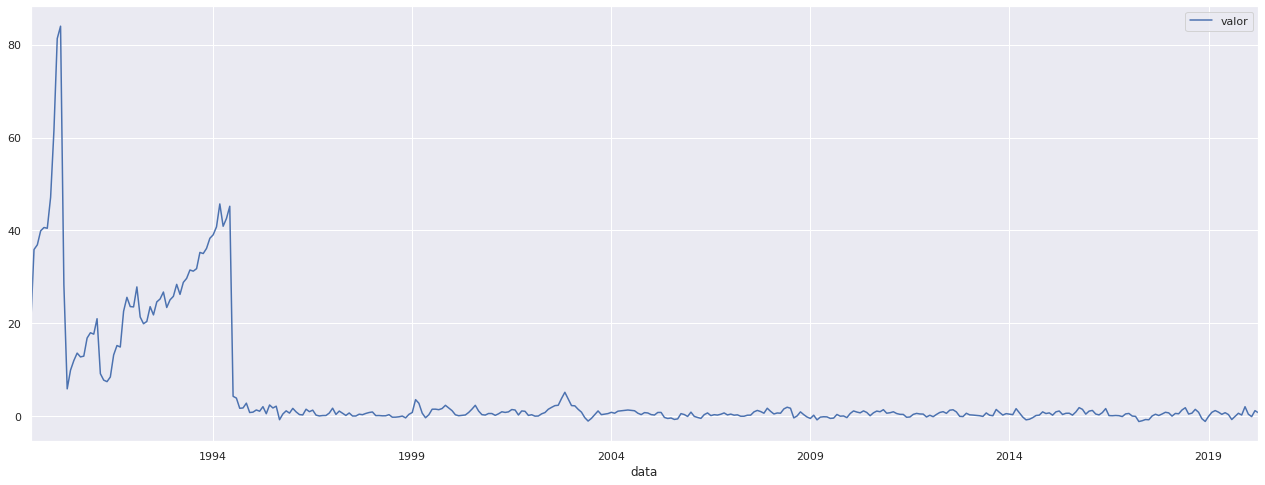

In [41]:
igpm.plot(figsize=(22,8))

In [38]:
cdi = consulta_bc(12)
cdi

,valor
data,
1986-03-06,0.068111
1986-03-10,0.069028
1986-03-12,0.067417
1986-03-14,0.064584
1986-03-17,0.068222
...,...
2020-05-14,0.011345
2020-05-15,0.011345
2020-05-18,0.011345


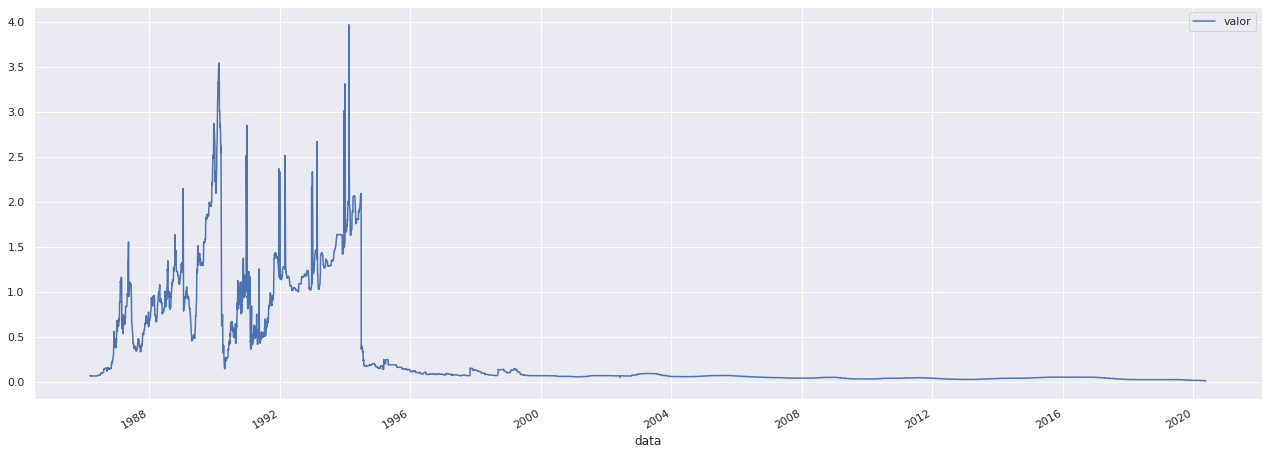

In [42]:
cdi.plot(figsize=(22,8))

In [39]:
selic = consulta_bc(11)
selic

,valor
data,
1986-06-04,0.065041
1986-06-05,0.067397
1986-06-06,0.066740
1986-06-09,0.068247
1986-06-10,0.067041
...,...
2020-05-15,0.011345
2020-05-18,0.011345
2020-05-19,0.011345


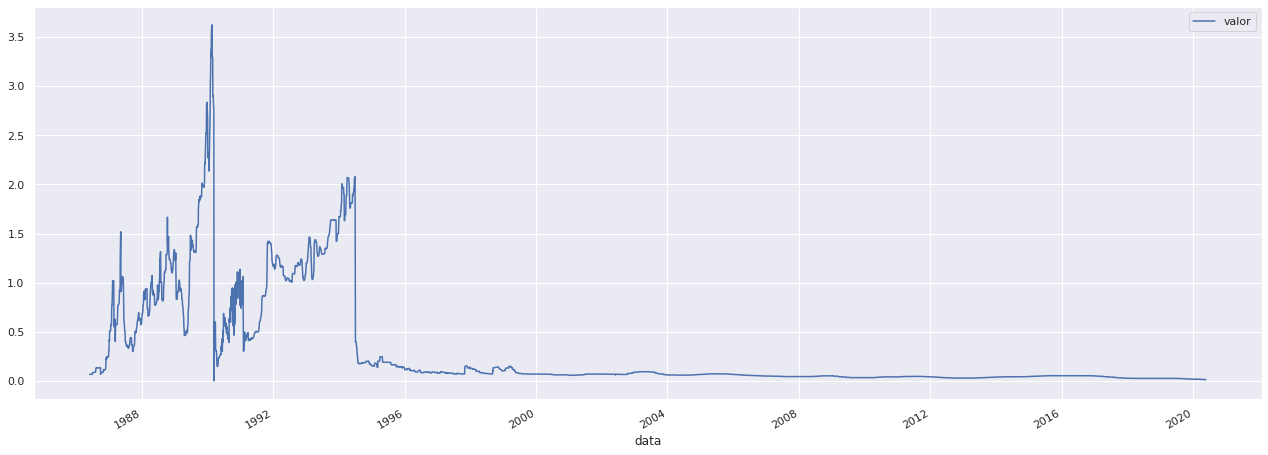

In [43]:
selic.plot(figsize=(22,8))

In [44]:
reservas_internacionais = consulta_bc(13621)
reservas_internacionais

,valor
data,
1998-09-01,65969
1998-09-02,63083
1998-09-03,61984
1998-09-04,60702
1998-09-08,59449
...,...
2020-05-14,343157
2020-05-15,343282
2020-05-18,342894


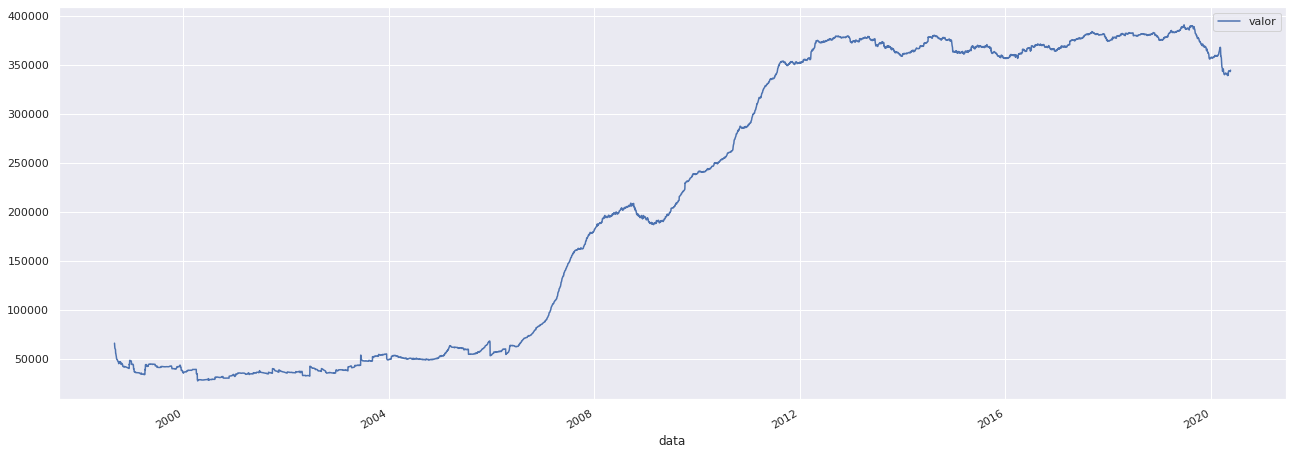

In [47]:
reservas_internacionais.plot(figsize=(22,8))

In [49]:
taxa_de_desocupacao = consulta_bc(24369)
taxa_de_desocupacao

,valor
data,
2012-03-01,7.9
2012-04-01,7.7
2012-05-01,7.6
2012-06-01,7.5
2012-07-01,7.4
...,...
2019-11-01,11.2
2019-12-01,11.0
2020-01-01,11.2


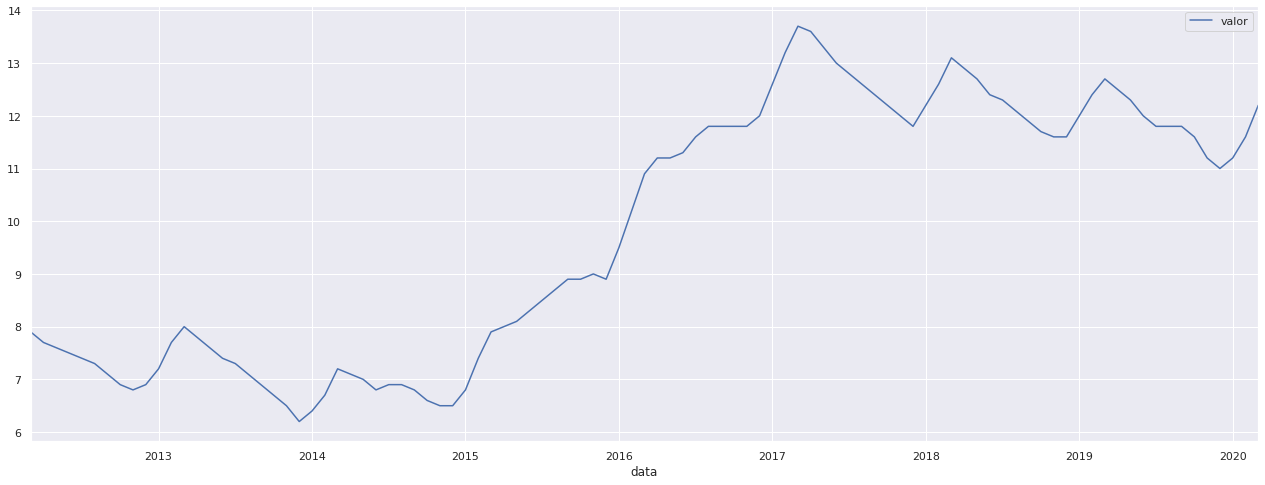

In [50]:
taxa_de_desocupacao.plot(figsize=(22,8))

# CDI x IBOV

In [51]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=4247610495f6b195bb831b61e54c292d30cefaa15a9b480baae3a9419cd49171
  Stored in directory: /tmp/pip-ephem-wheel-cache-nm88ye92/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [53]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [0]:
#Date Normalizing for 2000
data_start = '2000-01-01'

In [0]:
ibov_return = ibov.pct_change()

In [0]:
ibov_acum_return = (1 + ibov_return[ibov_return.index >= data_start]).cumprod()
ibov_acum_return.iloc[0] = 1

In [0]:
cdi_acum = (1 + cdi[cdi.index >= data_start] / 100).cumprod()
cdi_acum.iloc[0] = 1

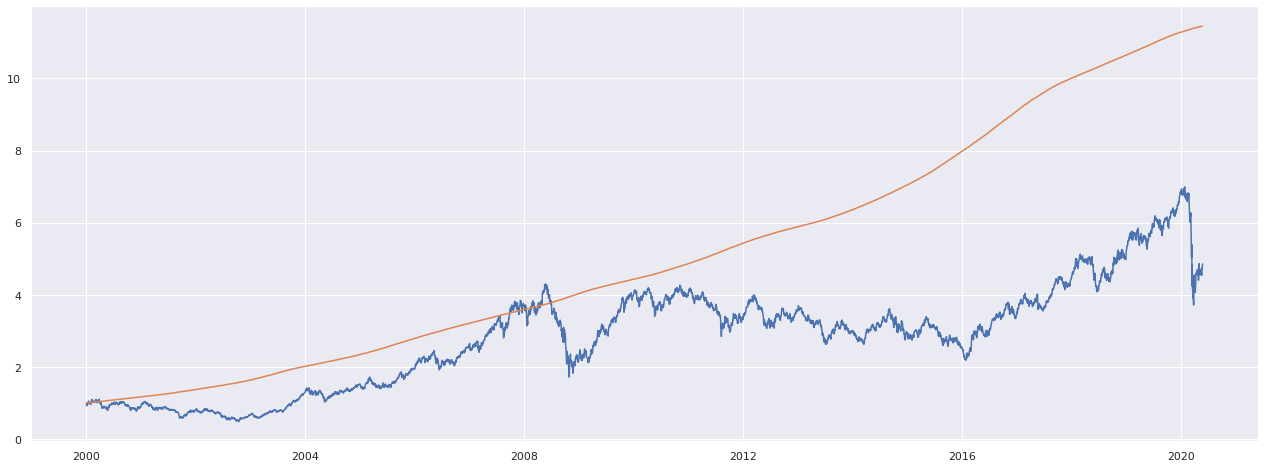

In [82]:
#Figures on same axis
fig, ax = plt.subplots(figsize=(22,8))
ax.plot(ibov_acum_return)
ax.plot(cdi_acum);

In [114]:
dolar = consulta_bc(1)
dolar

,valor
data,
1984-11-28,2828.0000
1984-11-29,2828.0000
1984-11-30,2881.0000
1984-12-03,2881.0000
1984-12-04,2881.0000
...,...
2020-05-15,5.8229
2020-05-18,5.7375
2020-05-19,5.7216


# CDI x IBOV x DOLAR

In [0]:
dolar = (dolar[dolar.index >= data_start])
dolar_return = dolar.pct_change()

In [0]:
dolar_acum_return = ( 1 + dolar_return)
dolar_acum_return.iloc[0] = 1

In [119]:
dolar_acum_return

,valor
data,
2000-01-03,1.000000
2000-01-04,1.018100
2000-01-05,1.011289
2000-01-06,0.995524
2000-01-07,0.990250
...,...
2020-05-15,0.980749
2020-05-18,0.985334
2020-05-19,0.997229


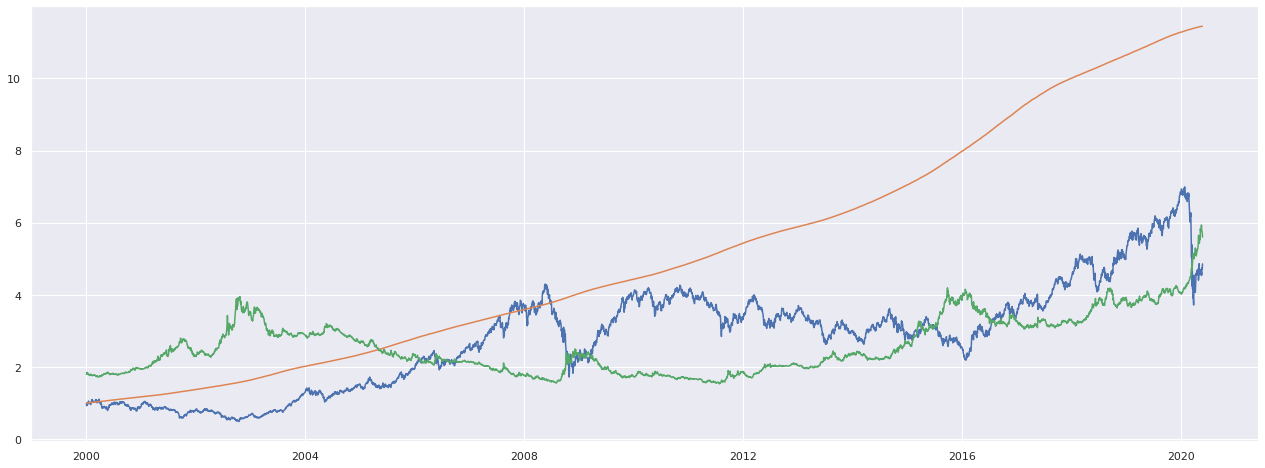

In [120]:
fig, ax = plt.subplots(figsize=(22,8))
ax.plot(ibov_acum_return)
ax.plot(cdi_acum)
ax.plot(dolar);